In [148]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from math import floor
from pprint import pprint
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [149]:
file_path=Path("../output_data/fred_data.csv")
new_df = pd.read_csv(file_path)
new_df

,Year,Avg. 30 Year Fixed Mortgage Rate,Avg. 15 Year Fixed Mortgage Rate,Avg. Median Home Sale Price,Avg. Housing Inventory,Avg. Home Price Index,Avg. GDP (Billions of $),Avg. CPI,Avg. Unemployment Rate,Avg. Household Debt to GDP
0,1963,NaN,NaN,18050.00,NaN,NaN,637.45,31.81,5.64,NaN
1,1964,NaN,NaN,18925.00,NaN,NaN,684.46,32.30,5.16,NaN
2,1965,NaN,NaN,20125.00,NaN,NaN,742.29,32.73,4.51,NaN
3,1966,NaN,NaN,21500.00,NaN,NaN,813.41,33.55,3.79,NaN
4,1967,NaN,NaN,22750.00,NaN,NaN,859.96,34.71,3.84,NaN
...,...,...,...,...,...,...,...,...,...,...
56,2019,3.94,3.39,320250.00,1113750.0,209.45,21521.40,263.21,3.68,76.27
57,2020,3.11,2.60,336950.00,838500.0,222.12,21322.95,267.70,8.09,80.03
58,2021,2.96,2.27,396800.00,727000.0,260.06,23594.03,277.25,5.37,77.97
59,2022,5.34,4.58,457475.00,714250.0,298.52,25744.11,294.30,3.64,76.64


In [150]:
drop_df = new_df.dropna()
drop_df

,Year,Avg. 30 Year Fixed Mortgage Rate,Avg. 15 Year Fixed Mortgage Rate,Avg. Median Home Sale Price,Avg. Housing Inventory,Avg. Home Price Index,Avg. GDP (Billions of $),Avg. CPI,Avg. Unemployment Rate,Avg. Household Debt to GDP
42,2005,5.87,5.42,236550.00,1467500.0,171.78,13039.20,200.87,5.08,90.68
43,2006,6.41,6.07,243750.00,1853500.0,183.48,13815.58,205.92,4.61,95.35
44,2007,6.34,6.03,244950.00,2135000.0,179.94,14474.23,210.73,4.62,98.15
45,2008,6.03,5.62,229550.00,2229750.0,164.06,14769.86,215.57,5.80,99.06
46,2009,5.04,4.57,215650.00,2036000.0,148.55,14478.07,219.24,9.28,99.27
47,2010,4.69,4.10,222700.00,2000250.0,144.67,15048.97,221.34,9.61,94.12
48,2011,4.45,3.68,224900.00,1902250.0,139.24,15599.73,225.01,8.93,89.93
49,2012,3.66,2.93,244400.00,1555750.0,140.99,16253.97,229.76,8.07,85.69
50,2013,3.98,3.10,266225.00,1538250.0,154.52,16880.68,233.81,7.36,82.90
51,2014,4.17,3.29,285775.00,1452500.0,164.68,17608.14,237.90,6.16,80.86


In [151]:
# Calculate the correlation coefficient between Avg. 30 Year Fixed Mortgage Rate and Avg. Home Price Index
#Drop N/A Values 
analysis1_df = new_df
analysis1_df= analysis1_df[["Year","Avg. 30 Year Fixed Mortgage Rate","Avg. Home Price Index"]]
analysis1_df = analysis1_df.dropna()
correlation_coefficient = analysis1_df['Avg. 30 Year Fixed Mortgage Rate'].corr(analysis1_df["Avg. Home Price Index"])
print(f"Correlation Coefficient: {correlation_coefficient}") 

Correlation Coefficient: -0.7029668139064117


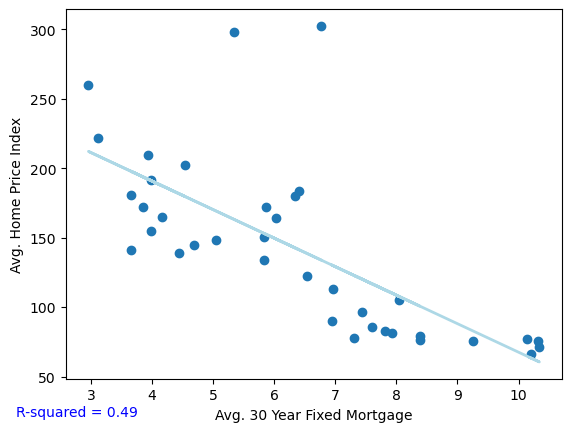

R-squared value: 0.49


In [163]:
# Plot Avg. 30 Year Fixed Mortgage versus Avg. Home Price Index

# #Drop N/A Values 
new_df_cleaned = new_df.dropna(subset=["Avg. 30 Year Fixed Mortgage Rate", "Avg. Home Price Index"])

# Cleaned data
X = new_df_cleaned.loc[:, "Avg. 30 Year Fixed Mortgage Rate"].values.reshape(-1, 1)
y = new_df_cleaned.loc[:, "Avg. Home Price Index"].values

# Create fitting linear regression model
model = LinearRegression()
model.fit(X, y)

# Predicting with the model
y_pred = model.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Scatter plot
plt.scatter(X, y, label='Actual data')

# Plote regression line
plt.plot(X, y_pred, color='lightblue', linewidth=2, label='Linear regression model')

# Add labels and legend
plt.xlabel('Avg. 30 Year Fixed Mortgage')
plt.ylabel('Avg. Home Price Index')


# Print R-squared
plt.annotate(f'R-squared = {r2:.2f}', xy=(-0.10, -0.10), xycoords='axes fraction', fontsize=10, color='blue')


# Print
plt.show()
# Print R-squared
print(f'R-squared value: {r2:.2f}')

In [153]:
# Calculate the correlation coefficient between Avg. 15 Year Fixed Mortgage Rate and Avg. Home Price Index
#Drop N/A Values 
analysis2_df = new_df
analysis2_df= analysis2_df[["Year","Avg. 15 Year Fixed Mortgage Rate","Avg. Home Price Index"]]
analysis2_df = analysis2_df.dropna()
correlation_coefficient = analysis2_df['Avg. 15 Year Fixed Mortgage Rate'].corr(analysis2_df["Avg. Home Price Index"])
print(f"Correlation Coefficient: {correlation_coefficient}") 

Correlation Coefficient: -0.6383970001509593


In [154]:
r2 = r2_score(y, y_pred)

In [155]:
# Plot Avg. 15 Year Fixed Mortgage versus Avg. Home Price Index
#plt.scatter(new_df.loc[:,"Avg. 15 Year Fixed Mortgage Rate"],new_df.loc[:,"Avg. Home Price Index"])
#plt.xlabel('Avg. 15 Year Fixed Mortgage')
#plt.ylabel('Avg. home price index')
#plt.show()

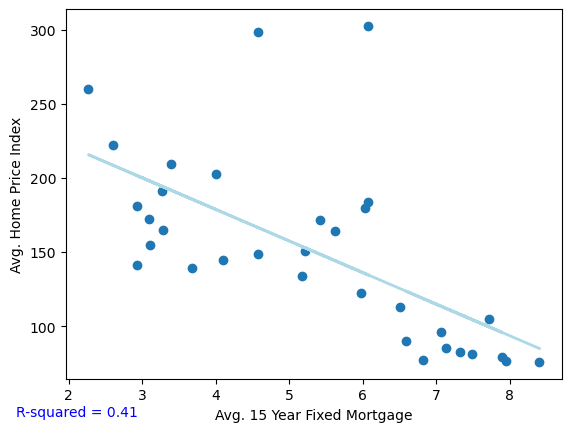

R-squared value: 0.41


In [156]:
# Plot Avg. 30 Year Fixed Mortgage versus Avg. Home Price Index
# #Drop N/A Values 
new_df_cleaned = new_df.dropna(subset=["Avg. 15 Year Fixed Mortgage Rate", "Avg. Home Price Index"])

# Cleaned data
X = new_df_cleaned.loc[:, "Avg. 15 Year Fixed Mortgage Rate"].values.reshape(-1, 1)
y = new_df_cleaned.loc[:, "Avg. Home Price Index"].values

# Create fitting linear regression model
model = LinearRegression()
model.fit(X, y)

# Predicting with the model
y_pred = model.predict(X)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Scatter plot
plt.scatter(X, y, label='Actual data')

# Plote regression line
plt.plot(X, y_pred, color='lightblue', linewidth=2, label='Linear regression model')

# Add labels and legend
plt.xlabel('Avg. 15 Year Fixed Mortgage')
plt.ylabel('Avg. Home Price Index')


# Print R-squared
plt.annotate(f'R-squared = {r2:.2f}', xy=(-0.10, -0.10), xycoords='axes fraction', fontsize=10, color='blue')

# Print
plt.show()

# Print R-squared
print(f'R-squared value: {r2:.2f}')

R-squared value for Avg. 15 Year Fixed Mortgage Rate: 0.41
R-squared value for Avg. 30 Year Fixed Mortgage Rate: 0.41


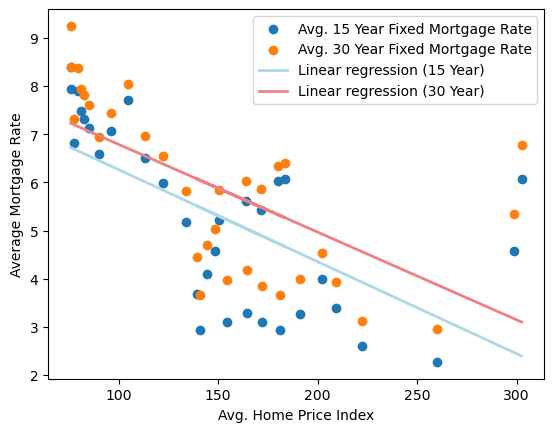

In [166]:
# Plot Avg. 15 & 30 Years Fixed Mortgage versus Avg. Home Price Index

# #Drop N/A Values 
new_df_cleaned = new_df.dropna(subset=["Avg. 15 Year Fixed Mortgage Rate", "Avg. 30 Year Fixed Mortgage Rate", "Avg. Home Price Index"])

# Cleaned data
X = new_df_cleaned.loc[:, "Avg. Home Price Index"].values.reshape(-1, 1)
y_15_year = new_df_cleaned.loc[:, "Avg. 15 Year Fixed Mortgage Rate"].values
y_30_year = new_df_cleaned.loc[:, "Avg. 30 Year Fixed Mortgage Rate"].values

# Create fitting linear regression models
model_15_year = LinearRegression()
model_30_year = LinearRegression()
model_15_year.fit(X, y_15_year)
model_30_year.fit(X, y_30_year)

# Predicting with the models
y_pred_15_year = model_15_year.predict(X)
y_pred_30_year = model_30_year.predict(X)

#Calculate R-squared for 15 & 30 
r2_15_year = r2_score(y_15_year, y_pred_15_year)
r2_30_year = r2_score(y_30_year, y_pred_30_year)

# Scatter plots
plt.scatter(X, y_15_year, label='Avg. 15 Year Fixed Mortgage Rate', marker='o')
plt.scatter(X, y_30_year, label='Avg. 30 Year Fixed Mortgage Rate', marker='o')

# Plotting the regression lines
plt.plot(X, y_pred_15_year, color='lightblue', linewidth=2, label='Linear regression (15 Year)')
plt.plot(X, y_pred_30_year, color='lightcoral', linewidth=2, label='Linear regression (30 Year)')

# Add labels and legend
plt.xlabel('Avg. Home Price Index')
plt.ylabel('Average Mortgage Rate')
plt.legend()

# Print R-squared for 15 % 30
print(f'R-squared value for Avg. 15 Year Fixed Mortgage Rate: {r2_15_year:.2f}')
print(f'R-squared value for Avg. 30 Year Fixed Mortgage Rate: {r2_30_year:.2f}')

# print
plt.show()